In [1]:
# jupyter 상에서 SVG 이미지를 표시하기 위한 패키지(jupyter 기본 내장 패키지)
from IPython.display import SVG

# TAG로부터 원하는 내용을 추출하는 클래스 -> SVG 이미지의 핸들링을 위함
from bs4 import BeautifulSoup

# 원격지의 svg 파일의 내용을 읽어오기 위함.
import requests

from pandas import pivot_table, read_csv, read_excel,DataFrame
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sb
import folium
import folium
from os import path, mkdir

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
ha = read_csv('C:/Users/User/Desktop/세종특별자치시_공공기관현황_20221107.csv', encoding='cp949')
ha


,구분,도로명주소,지번주소,위도,경도,전화번호,홈페이지,등록기준일
0,세종특별자치시청,세종특별자치시 한누리대로 2130,세종특별자치시 보람동 663,36.480058,127.289039,044-300-3114,http://www.sejong.go.kr/,2022-11-07
1,세종특별자치시의회,세종특별자치시 한누리대로 2120,세종특별자치시 보람동 625-6,36.480021,127.290451,044-300-7000,http://council.sejong.go.kr/index.do,2022-11-07
2,보건소,세종특별자치시 조치원읍 건강길 16,세종특별자치시 조치원읍 교리 129-1,36.605676,127.296515,044-301-2000,http://www.sejong.go.kr/health.do,2022-11-07
3,농업기술센터,세종특별자치시 연서면 월하천로 289,세종특별자치시 연서면 쌍전리 16,36.572999,127.283188,044-301-2500,http://www.sejong.go.kr/adtc.do,2022-11-07
4,시설관리사업소,세종특별자치시 전동면 심동로 354,세종특별자치시 전동면 심중리 82,36.670859,127.300290,044-301-3500,http://www.sejong.go.kr/facility.do,2022-11-07
5,조치원읍사무소,세종특별자치시 조치원읍 새내16길 17,세종특별자치시 조치원읍 교리 9-1,36.604548,127.298460,044-301-5000,http://www.sejong.go.kr/dong.do,2022-11-07
6,연기면사무소,세종특별자치시 연기면 당산로 81,세종특별자치시 연기면 한별리 317-34,36.541827,127.273531,044-301-5200,http://www.sejong.go.kr/dong.do,2022-11-07
7,연동면사무소,세종특별자치시 연동면 내송길 20,세종특별자치시 연동면 내판리 9-2,36.559210,127.326691,044-301-5300,http://www.sejong.go.kr/dong.do,2022-11-07
8,부강면사무소,세종특별자치시 부강면 부강5길 38,세종특별자치시 부강면 부강리 138,36.529426,127.370753,044-301-5400,http://www.sejong.go.kr/dong.do,2022-11-07
9,금남면사무소,세종특별자치시 금남면 용포로 57,세종특별자치시 금남면 용포리 122-1,36.463737,127.280287,044-301-5500,http://www.sejong.go.kr/dong.do,2022-11-07


In [4]:
ilist = list(ha.dtypes.index)
ilist

['구분', '도로명주소', '지번주소', '위도', '경도', '전화번호', '홈페이지', '등록기준일']

In [5]:
pdf = ha.filter(['구분','위도','경도'])
pdf

,구분,위도,경도
0,세종특별자치시청,36.480058,127.289039
1,세종특별자치시의회,36.480021,127.290451
2,보건소,36.605676,127.296515
3,농업기술센터,36.572999,127.283188
4,시설관리사업소,36.670859,127.300290
5,조치원읍사무소,36.604548,127.298460
6,연기면사무소,36.541827,127.273531
7,연동면사무소,36.559210,127.326691
8,부강면사무소,36.529426,127.370753
9,금남면사무소,36.463737,127.280287


In [6]:
map_osm = folium.Map(location=[37.566651, 126.978428], zoom_start=12)

html = "<font color='green' style='white-space: nowrap'><b>%s</b></font>"

# 데이터프레임의 행 수만큼 반복하면서 마커 생성
for i in pdf.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = pdf.loc[i, '구분']
    lat = pdf.loc[i, '위도']
    lng = pdf.loc[i, '경도']
    
    # 추출한 정보를 지도에 표시
    popup_html = folium.Popup(html % name, parse_html=False)
    marker = folium.Marker([lat,lng], popup=popup_html)
    marker.add_to(map_osm)
map_osm



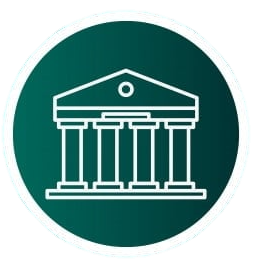
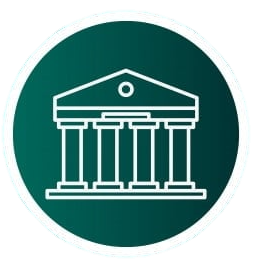
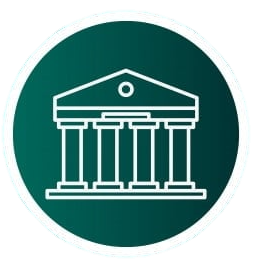
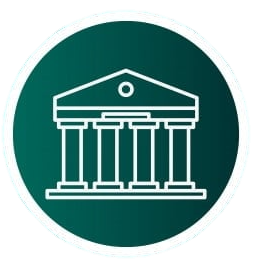
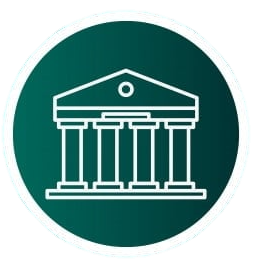
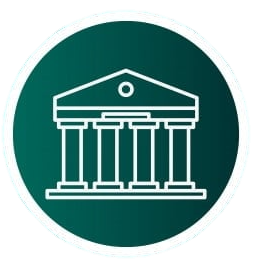
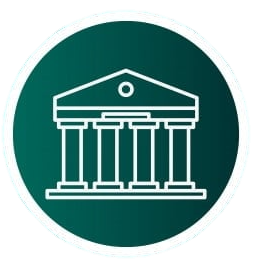
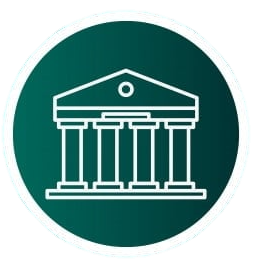
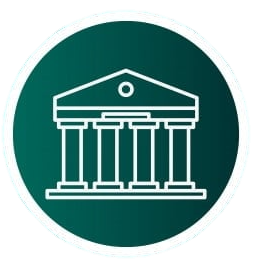
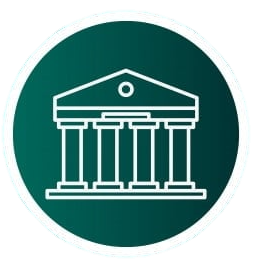
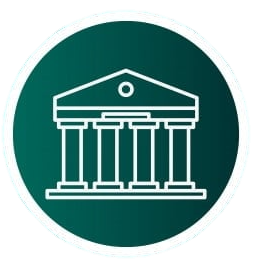
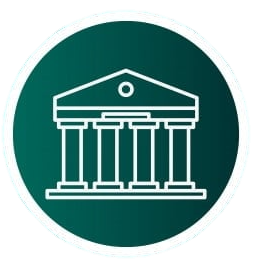
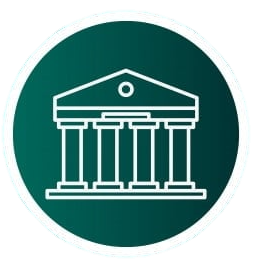
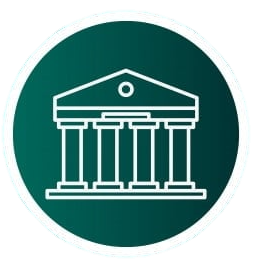
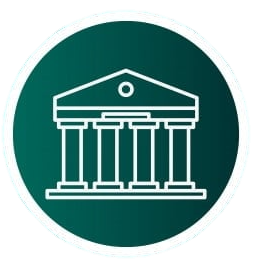
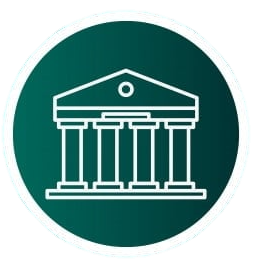
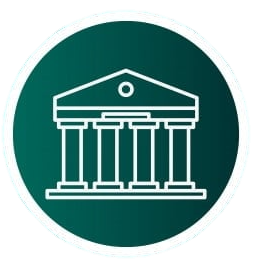
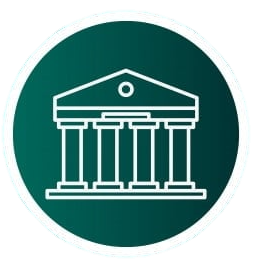
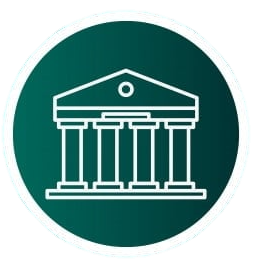
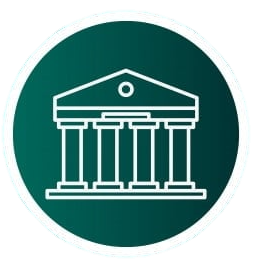
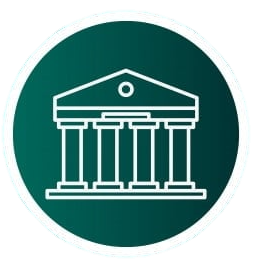
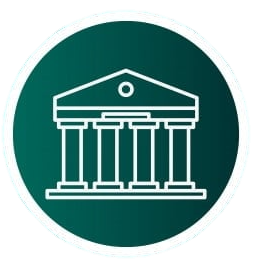
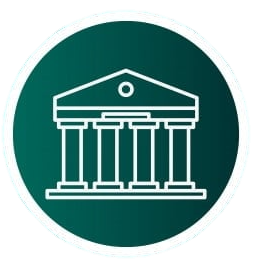
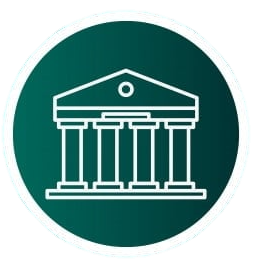
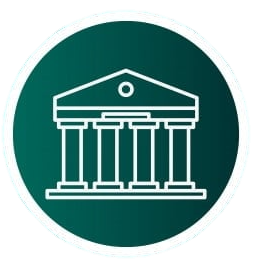
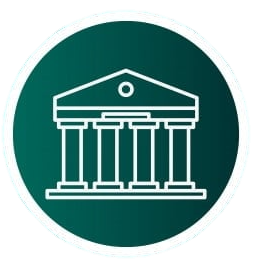
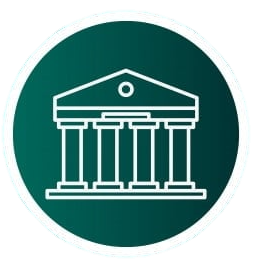
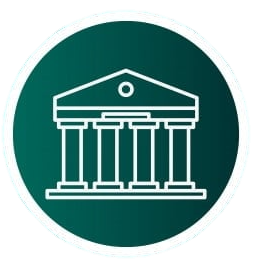
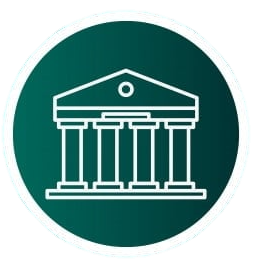
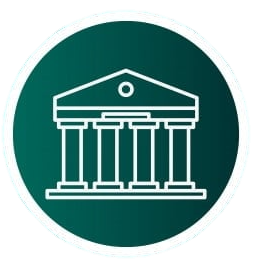
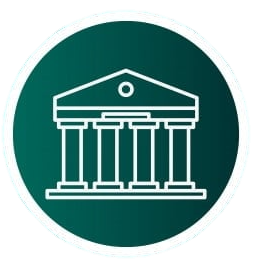
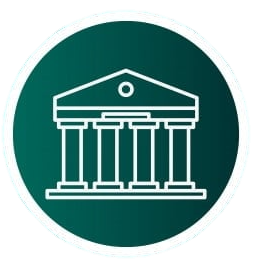
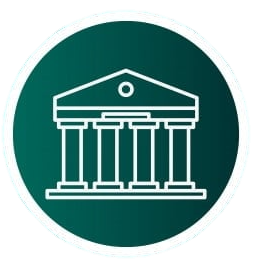
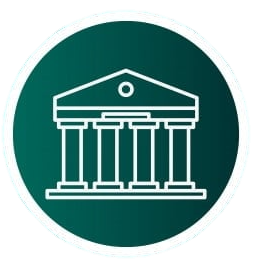

In [7]:
# 데이터프레임 생성 (예시)
data =DataFrame({
    'x-coordinate': pdf['위도'],
    'y-coordinate': pdf['경도'],
    'popup': pdf['구분'] #popup 기능 대체
})

# 새로운 지도 객체 생성
world = folium.Map(location=[36.480058,127.289039],zoom_start=15) #지도 조회시 처음 비춰지는 곳 setting

# 데이터프레임의 행 수만큼 반복하면서 마커 생성
for index, row in data.iterrows():
    # 내 컴퓨터상의 아이콘 사용 (pushpin.png 이미지를 사용)
    iconimg = folium.features.CustomIcon('C:/Users/User/Desktop/공공기관.PNG', icon_size=(30, 30))
    folium.Marker([row['x-coordinate'], row['y-coordinate']],
                  icon=iconimg,
                  popup=row['popup']).add_to(world)

# 지도 출력
world